In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('ngc6475.csv')
x = df['BP-RP']
y = df['Gmag']

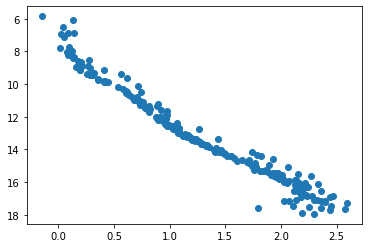

In [3]:
plt.scatter(x,y)
plt.gca().invert_yaxis()

In [4]:
def distancia(P1,P2): #P1 PONTO 1, P2 PONTO 2
    array = P1-P2
    final = np.zeros(len(array))
    for i in range(len(array)):
        final[i] = np.sqrt(array[i][0]**2 + array[i][1]**2)
    return final

import time 

In [5]:
def vizinhos(raio, n_estrelas):
    estrelas_finais = np.empty((0,2))
    for i in range(len(ptos)):
        distancias = distancia(ptos[i],ptos)
        menores = np.sort(distancias)[:n_estrelas+1]
        comp = menores[-1]<=raio
        if comp == False:
            continue
        else:
            estrelas_finais = np.append(estrelas_finais, np.array([ptos[i]]), axis  = 0) #problema no formato do array para dar append
    return estrelas_finais



186

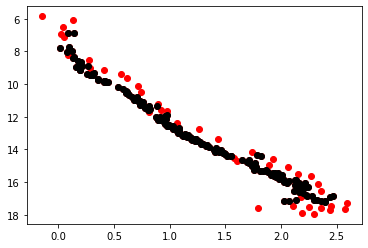

In [18]:
ptos  = np.dstack((x,y))[0]

pontos = vizinhos(0.1,1)
cor, mag = pontos.T

plt.scatter(cor,mag, color = 'k', zorder = 100)
plt.scatter(x,y,color  = 'red')
plt.gca().invert_yaxis()
len(cor)

In [7]:
def not_common(A,B):
    nrows, ncols = A.shape
    dtype={'names':['f{}'.format(i) for i in range(ncols)],
           'formats':ncols * [A.dtype]}

    C = np.intersect1d(A.view(dtype), B.view(dtype))

    # This last bit is optional if you're okay with "C" being a structured array...
    C = C.view(A.dtype).reshape(-1, ncols)
    return C

#not_common(ptos,pontos)

In [2]:
filipe = pd.read_csv('6475_membros')

fx = filipe['BPMAG'] - filipe['RPMAG']
fy = filipe['GMAG']


ptos  = np.dstack((fx,fy))[0]
          

430

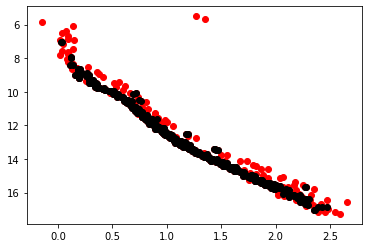

In [35]:
s = time.time()

ptos  = np.dstack((fx,fy))[0]
pontos = vizinhos(0.05,1)
cor, mag = pontos.T

e = time.time()

plt.scatter(cor,mag, color = 'k', zorder = 100)
plt.scatter(fx,fy, color  = 'red')
plt.gca().invert_yaxis()
len(cor)

In [4]:
def count_neighbours(point, all_points, n):
    """
    Count the neighbours of a point, where neighbours are other points in
    all_points that are within a square of side length n, centered on point.

    Arguments:
    point -- the point on which the square will be centered.
    all_points -- the set of points to check.
    n -- the side length of the square.
    """
    px = point[0]  # x-value (first coordinate) of the point p
    py = point[1]  # y-value (second coordinate) of the point p
    offset = n/2  # half of square side length
    neighbours_x = all_points[:, 0] >= px-offset
    # is a point >= the lower bound in x?
    neighbours_x &= (all_points[:, 0] <= px+offset)
    # is a point <= the upper bound in x?
    neighbours_y = all_points[:, 1] >= py-offset  # lower bound in y
    neighbours_y &= all_points[:, 1] <= py+offset  # upper bound in y
    neighbours = neighbours_x & neighbours_y  # neighbours in both axes

    return neighbours.sum()

In [5]:
def square(size_box,n_stars):
    estrelas_finais = np.empty((0,2))
    for i in range(len(ptos)):
        numero = count_neighbours(ptos[i],ptos,size_box)
        if numero >=n_stars+1:
            estrelas_finais = np.append(estrelas_finais, np.array([ptos[i]]), axis  = 0) #problema no formato do array para dar append
        else:
            continue
    return estrelas_finais

In [15]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

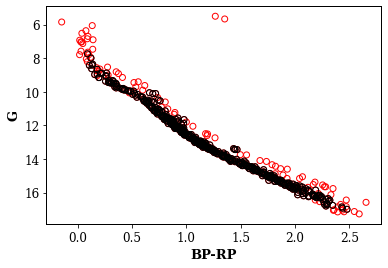

In [23]:
s = time.time()

ptos  = np.dstack((fx,fy))[0]
pontos = square(0.15,2)

a,b  = pontos.T

e = time.time()
plt.scatter(a,b, zorder = 100, color = 'none', edgecolor = 'k')
plt.scatter(fx,fy, color = 'none', edgecolor = 'red')
plt.xlabel('BP-RP', fontweight = 'bold')
plt.ylabel('G', fontweight = 'bold')
plt.gca().invert_yaxis()
plt.savefig('depois.png', format = 'png', dpi = 300)

In [29]:
len(fx)

541